### Import necessary libraries for the experiment

In [1]:
import os
current_directory = os.getcwd()
print(current_directory)

/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification


In [2]:
import numpy
numpy.version.version

'1.22.0'

In [3]:
# importing libraries

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
#from keras_preprocessing.sequence import pad_sequences
#from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.python.keras.models import Model, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Input, LSTM, Embedding, Dropout, SpatialDropout1D, Activation, SimpleRNN
from tensorflow.keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.optimizers import SGD

# For custom metrics
import keras.backend as K
from keras.utils.vis_utils import plot_model
from keras.callbacks import EarlyStopping 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import seaborn as sns
from IPython.display import Image

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
import os, re, csv, math, codecs
from nltk.tokenize import word_tokenize
import string
import gensim

sns.set_style("whitegrid")
np.random.seed(0)

2023-03-31 13:45:27.240085: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
#df1 = pd.read_csv('/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification/githubissuedata2M.csv')
df = pd.read_csv('/Users/macbookpro/hdd/MSc/Dissertation/multilabeltextclassification/githubissuedata.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226163 entries, 0 to 226162
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   title             225152 non-null  object
 1   body              225866 non-null  object
 2   task              226163 non-null  int64 
 3   bug               226163 non-null  int64 
 4   documentation     226163 non-null  int64 
 5   duplicate         226163 non-null  int64 
 6   enhancement       226163 non-null  int64 
 7   good_first_issue  226163 non-null  int64 
 8   help_wanted       226163 non-null  int64 
 9   invalid           226163 non-null  int64 
 10  question          226163 non-null  int64 
 11  wontfix           226163 non-null  int64 
 12  gitalk            226163 non-null  int64 
 13  priority_medium   226163 non-null  int64 
 14  priority_high     226163 non-null  int64 
 15  feature_request   226163 non-null  int64 
 16  feature           226163 non-null  int

In [5]:
df.head(10)

,title,body,task,bug,documentation,duplicate,enhancement,good_first_issue,help_wanted,invalid,question,wontfix,gitalk,priority_medium,priority_high,feature_request,feature
0,My Account Paid laptop 1440 resolution Updat...,Case:Distance between Registered email address...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
1,How to fix sleepimpl warning when ECS credenti...,Prerequisites X Ive searched for previous sim...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Slider doesnt work on touch devices,DescriptionSlider should work dragging in tou...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,add new labels,DescriptionAdd ui and logic to permanently ad...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,No lib sub folder in Boost folder,Hi I am following thishttps://www.mlpack.org/d...,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5,Add license notice to CLI,The CLI is missing the license notice. Theres ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,Should show Powershell or AzureCLI code necess...,There is example output from Powershell and Az...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7,tidboperator could not work with kubernetes 1.23,Bug ReportWhat version of Kubernetes are you ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8,Match Live,x Implement game logic x Calculate results ba...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,AngularBug Make current location widget more g...,If youve never submitted an issue to the SORMA...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 1308 missing values in test data.
The dataset has 46411 duplicates in train data.


In [7]:
# remove missing values in the dataset
df.dropna(inplace= True)
# remove all duplicate records in the dataset
df.drop_duplicates(inplace= True)

In [8]:
# check missing values in the dataset
print('The dataset has', df.isna().sum().sum(), 'missing values in test data.')
# check any duplicate records in the dataset
print('The dataset has', df.duplicated().sum(), 'duplicates in train data.')

The dataset has 0 missing values in test data.
The dataset has 0 duplicates in train data.


In [9]:
# spliting dataset to train and test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=25)

### Number of records in the train and test data

In [10]:
print("Train data shape", train_df.shape)
print("Test data shape", test_df.shape)

Train data shape (143145, 17)
Test data shape (35787, 17)


### CORRELATION BETWEEN DATA LABELS

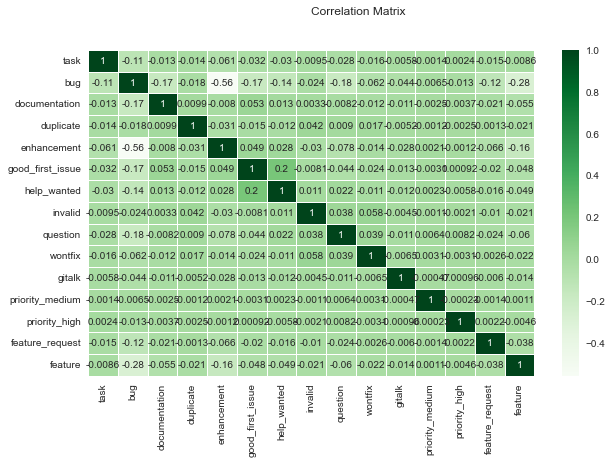

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Correlation Matrix')
sns.heatmap(train_df.corr(), annot=True, cmap="Greens", linewidths=.5, ax=ax);

The correlation figure below shows that Toxic" comments are clearly correlated with both "obscene" and "insult" comments. Interestingly, "toxic" and "severe_toxic" are only weakly correlated. While we can also observe that, "Obscene" comments and "insult" comments are also highly correlated, which makes perfect sense.

### DATA PREPROCESSING
Deep Neural Networks input layers make use of input variables to feed the network for training the model. But in this task (experiment), we're dealing with words text. How do we represent these words in order to feed our model?

In our experiment, we used densed representation of those text (comments) and their semanticity together. The advantage of using this approach is the best way for fitting neural networks onto a text data (as in our case), as well as less memory usage compared to other sparse representation approaches.


#### Word Embedding
Two ways to feed embeddings to neural networks:
   * Using your own word embeddings by training
   * Using pre-trained embedding (e.g Word2vec, lad2vec, Glove etc)
   


In [12]:
#Convert text to vectors using keras preprocessing library tools

X_train = train_df["body"].values
X_test  = test_df["body"].values

y_train = train_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values
y_test  = test_df[["task","bug","documentation","duplicate","enhancement","good_first_issue","help_wanted","invalid","question","wontfix","gitalk","priority_medium","priority_high","feature_request","feature"]].values






For the first embedding, we used keras preprocessing (Text Preprocessing) libraries. This class allows to vectorize a text corpus, by turning each text into either a sequence of integers (each integer being the index of a token in a dictionary) or into a vector where the coefficient for each token could be binary, based on word count, based on tf-idf

In [13]:
num_words = 20000 #Max. workds to use per issue
max_features = 200000 #Max. number of unique words in embeddinbg vector
max_len = 500 #Max. number of words per issue bodies to be use
embedding_dims = 128 #embedding vector output dimension 
num_epochs = 15 # (before 5)number of epochs (number of times that the model is exposed to the training dataset)
val_split = 0.1
batch_size2 = 256 #(before 32)The **batch size** is the number of training examples in one forward/backward pass.
                  # In general, larger batch sizes result in faster progress in training, but don't always converge as quickly. 
                  #Smaller batch sizes train slower, but can converge faster. And the higher the batch size, the more memory space you’ll need.

In [14]:
#Issue body Tokenization
tokenizer = tokenizer = Tokenizer(num_words)
tokenizer.fit_on_texts(list(X_train))

#Convert tokenized issue body text to sequnces
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
 
# padding the sequences
X_train = pad_sequences(X_train, max_len)
X_test  = pad_sequences(X_test,  max_len)

print('X_train shape:', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape: (143145, 500)
X_test shape:  (35787, 500)


##We use cross validation to split arrays or matrices of train data into random train and validation subsets

In [15]:
X_tra, X_val, y_tra, y_val = train_test_split(X_train, y_train, train_size =0.9, random_state=233)

## METHODS ( CNN, RNN, LSTM, all  using Glove)

#### We used early callback functionality that allows you to specify the performance measure to monitor, the trigger, and once triggered. It will stop the training process.

In [16]:
early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

#### Using Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate our model

In [58]:
#Writing functions for Precision, Recall, F1-Measure, AUC, mean etc evaluaiton metrics to evaluate the model

#Import necessary libraries
4# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


def precision(y_true, y_pred):
    #Calculating precision, a metric for multi-label classification of how many selected items are relevant.
    
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision


def recall(y_true, y_pred):
    #Calculating recall, a metric for multi-label classification of how many relevant items are selected.
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

  #Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

def auroc(y_true, y_pred):
    auc = tf.keras.metrics.AUC(y_true, y_pred)[1]
    #auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

def fmeasure(y_true, y_pred):
    #Calculates the f-measure, the harmonic mean of precision and recall.
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

## USING PRE-TRAINED EMBEDDING (GLOVE)

## A) "Glove" as a pre-trained Embedding

#### Prepare the pre-trained embedding layer

Load glove embedding corpus

In [18]:
glove_file = open('glove.6B.100d.txt', encoding="utf8")
embeddings_index = dict()
for line in glove_file:
    val = line.split(' ')
    word = val[0]
    coefs = np.asarray(val[1:], dtype='float32')
    embeddings_index[word] = coefs
glove_file.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


#### Prepare the embedding matrix vectors in order to feed/pass the neural network

In [59]:
# create a weight matrix
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 100))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

## 1) Convolutional Neural Network (CNN) with Glove

In [60]:
#1 Convolutional Neural Network (CNN) with Glove
CNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    # ... 100 filters with a kernel size of 4 so that each convolution will consider a window of 4 word embeddings
    Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    #It will be added after the activation function between a convolutional and a max-pooling layer.
    BatchNormalization(),
    GlobalMaxPool1D(),
    Dropout(0.5),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])
    

In [61]:
CNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

### Visualize the Orchestrated CNN-Glove Model Architecture

In [62]:
CNN_Glove_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 500, 100)          131035400 
                                                                 
 spatial_dropout1d_4 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 conv1d_4 (Conv1D)           (None, 500, 100)          40100     
                                                                 
 batch_normalization_4 (Batc  (None, 500, 100)         400       
 hNormalization)                                                 
                                                                 
 global_max_pooling1d_4 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                      

In [63]:
y_tra[1]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
#plot the CNN_GLove model architecture

#plot_model(CNN_Glove_model, to_file='CNN_Glove_model_plot.png', show_shapes=True, show_layer_names=True)
#Image(retina=True, filename='CNN_Glove_model_plot.png')

In [65]:
CNN_Glove_model_fit = CNN_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])


Epoch 1/15
504/504 [==============================] - 182s 357ms/step - loss: 0.2193 - accuracy: 0.5109 - mean_pred: 0.0869 - fmeasure: 0.3743 - precision: 0.6299 - recall: 0.2721 - val_loss: 0.1881 - val_accuracy: 0.5622 - val_mean_pred: 0.0985 - val_fmeasure: 0.4416 - val_precision: 0.7223 - val_recall: 0.3184
Epoch 2/15
504/504 [==============================] - 168s 334ms/step - loss: 0.1848 - accuracy: 0.5538 - mean_pred: 0.0821 - fmeasure: 0.4290 - precision: 0.6919 - recall: 0.3123 - val_loss: 0.1766 - val_accuracy: 0.6033 - val_mean_pred: 0.0868 - val_fmeasure: 0.4536 - val_precision: 0.7664 - val_recall: 0.3226
Epoch 3/15
504/504 [==============================] - 171s 338ms/step - loss: 0.1796 - accuracy: 0.5746 - mean_pred: 0.0816 - fmeasure: 0.4628 - precision: 0.6993 - recall: 0.3467 - val_loss: 0.1714 - val_accuracy: 0.6150 - val_mean_pred: 0.0793 - val_fmeasure: 0.5067 - val_precision: 0.7508 - val_recall: 0.3827
Epoch 4/15
504/504 [==============================] - 168s

### Plot Training & Validation Accuracy with the Loss values of the CNN-Glove Model

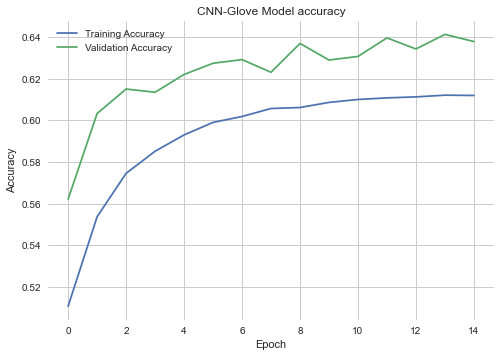

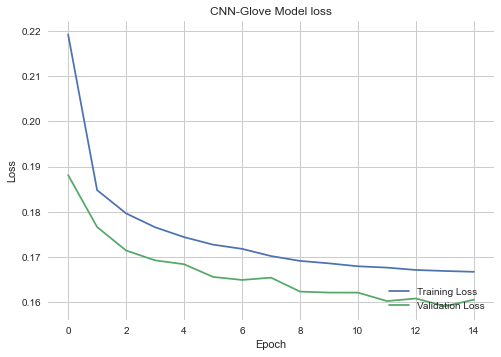

In [66]:
# Plot training & validation accuracy values
plt.plot(CNN_Glove_model_fit.history['accuracy'])
plt.plot(CNN_Glove_model_fit.history['val_accuracy'])
plt.title('CNN-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(CNN_Glove_model_fit.history['loss'])
plt.plot(CNN_Glove_model_fit.history['val_loss'])
plt.title('CNN-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 2) Recurrent Neural Network (RNN) with Glove

In [67]:
#2 Recurrent Neural Network (RNN) with Glove
RNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

2023-03-31 16:00:58.206342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 16:00:58.211389: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 16:00:58.213862: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [68]:
#Customized the evaluation to analyse the model in terms of accuracy and mean value accuracy
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

RNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

### Visualize the Orchestrated RNN-Glove MODEL Architecture

In [69]:
RNN_Glove_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 500, 100)          131035400 
                                                                 
 spatial_dropout1d_5 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 500, 50)          25200     
 l)                                                              
                                                                 
 batch_normalization_5 (Batc  (None, 500, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 500, 50)           0         
                                                      

In [70]:
RNN_Glove_model_fit = RNN_Glove_model.fit(X_train, y_train, batch_size=batch_size2, epochs=num_epochs, validation_split=val_split, callbacks=[early])

Epoch 1/15


2023-03-31 16:01:00.156006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 16:01:00.158584: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 16:01:00.160310: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1869 - accuracy: 0.5655 - mean_pred: 0.0825 - fmeasure: 0.4553 - precision: 0.6849 - recall: 0.3449

2023-03-31 16:07:09.215006: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 16:07:09.217306: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 16:07:09.218719: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 389s 754ms/step - loss: 0.1869 - accuracy: 0.5655 - mean_pred: 0.0825 - fmeasure: 0.4553 - precision: 0.6849 - recall: 0.3449 - val_loss: 0.2232 - val_accuracy: 0.6129 - val_mean_pred: 0.1598 - val_fmeasure: 0.5097 - val_precision: 0.7294 - val_recall: 0.3921
Epoch 2/15
504/504 [==============================] - 343s 680ms/step - loss: 0.1722 - accuracy: 0.6013 - mean_pred: 0.0811 - fmeasure: 0.5066 - precision: 0.7123 - recall: 0.3940 - val_loss: 0.2058 - val_accuracy: 0.6208 - val_mean_pred: 0.1443 - val_fmeasure: 0.5483 - val_precision: 0.7036 - val_recall: 0.4493
Epoch 3/15
504/504 [==============================] - 322s 640ms/step - loss: 0.1686 - accuracy: 0.6109 - mean_pred: 0.0812 - fmeasure: 0.5228 - precision: 0.7180 - recall: 0.4123 - val_loss: 0.1965 - val_accuracy: 0.6320 - val_mean_pred: 0.1387 - val_fmeasure: 0.5668 - val_precision: 0.7011 - val_recall: 0.4759
Epoch 4/15
504/504 [==============================] - 313s 622ms/step

### Plot Training & Validation Accuracy with the Loss values of the RNN-Glove Model

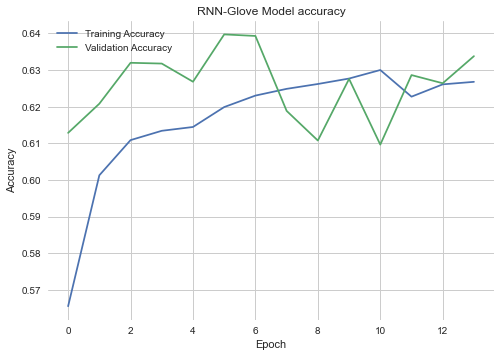

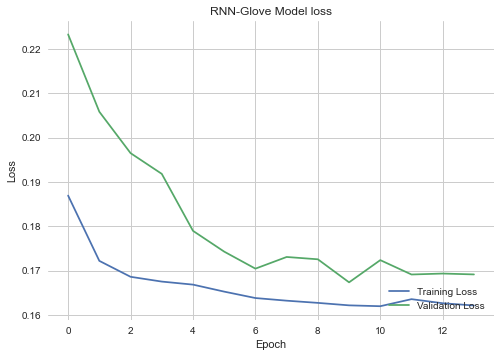

In [75]:
# Plot training & validation accuracy values
plt.plot(RNN_Glove_model_fit.history['accuracy'])
plt.plot(RNN_Glove_model_fit.history['val_accuracy'])
plt.title('RNN-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_Glove_model_fit.history['loss'])
plt.plot(RNN_Glove_model_fit.history['val_loss'])
plt.title('RNN-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 3) LSTM with Glove

In [76]:
LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])

LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

2023-03-31 17:31:21.039100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 17:31:21.040605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 17:31:21.042830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Visualize the Orchestrated LSTM-Glove Model Architecture

In [77]:
LSTM_Glove_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 500, 100)          131035400 
                                                                 
 spatial_dropout1d_7 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 500, 25)           12600     
                                                                 
 batch_normalization_7 (Batc  (None, 500, 25)          100       
 hNormalization)                                                 
                                                                 
 dropout_7 (Dropout)         (None, 500, 25)           0         
                                                                 
 global_max_pooling1d_7 (Glo  (None, 25)              

In [78]:
LSTM_Glove_model_fit = LSTM_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])



Epoch 1/15


2023-03-31 17:31:21.493816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 17:31:21.495486: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 17:31:21.498785: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1894 - accuracy: 0.5522 - mean_pred: 0.0835 - fmeasure: 0.4321 - precision: 0.6890 - recall: 0.3199

2023-03-31 17:34:36.172784: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 17:34:36.175178: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 17:34:36.176926: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 205s 396ms/step - loss: 0.1894 - accuracy: 0.5522 - mean_pred: 0.0835 - fmeasure: 0.4321 - precision: 0.6890 - recall: 0.3199 - val_loss: 0.2090 - val_accuracy: 0.5914 - val_mean_pred: 0.1417 - val_fmeasure: 0.4847 - val_precision: 0.7257 - val_recall: 0.3642
Epoch 2/15
504/504 [==============================] - 198s 392ms/step - loss: 0.1739 - accuracy: 0.5945 - mean_pred: 0.0811 - fmeasure: 0.4929 - precision: 0.7139 - recall: 0.3778 - val_loss: 0.2067 - val_accuracy: 0.6177 - val_mean_pred: 0.1442 - val_fmeasure: 0.5247 - val_precision: 0.7337 - val_recall: 0.4087
Epoch 3/15
504/504 [==============================] - 195s 388ms/step - loss: 0.1712 - accuracy: 0.6038 - mean_pred: 0.0810 - fmeasure: 0.5088 - precision: 0.7133 - recall: 0.3971 - val_loss: 0.1955 - val_accuracy: 0.6110 - val_mean_pred: 0.1272 - val_fmeasure: 0.5378 - val_precision: 0.7079 - val_recall: 0.4340
Epoch 4/15
504/504 [==============================] - 200s 397ms/step

### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model



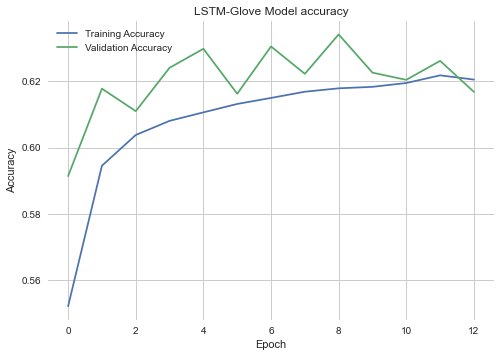

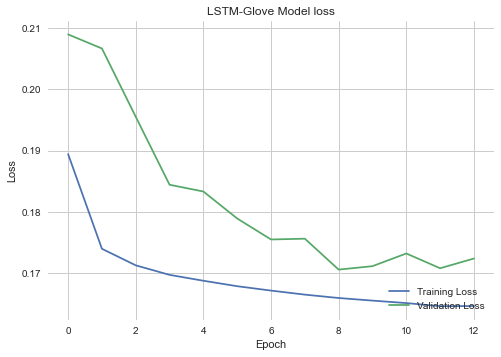

In [83]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Glove_model_fit.history['accuracy'])
plt.plot(LSTM_Glove_model_fit.history['val_accuracy'])
plt.title('LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.plot(LSTM_Glove_model_fit.history['val_loss'])
plt.title('LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()


## 4) Bidirecitional LSTM with Glove

In [84]:
#4 Bidirecitional LSTM with Glove
Bil_LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    Bidirectional(LSTM(25, return_sequences=True)),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(15, activation = 'sigmoid')
])


Bil_LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy', mean_pred, fmeasure, precision, recall])

2023-03-31 18:19:49.147463: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 18:19:49.149597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 18:19:49.151041: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

### Visualize the Orchestrated Bidirectional LSTM-Glove Model Architecture

In [85]:
Bil_LSTM_Glove_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 500, 100)          131035400 
                                                                 
 spatial_dropout1d_9 (Spatia  (None, 500, 100)         0         
 lDropout1D)                                                     
                                                                 
 bidirectional_2 (Bidirectio  (None, 500, 50)          25200     
 nal)                                                            
                                                                 
 batch_normalization_9 (Batc  (None, 500, 50)          200       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 500, 50)           0         
                                                      

In [86]:
Bil_LSTM_Glove_model_fit = Bil_LSTM_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15


2023-03-31 18:19:49.806801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 18:19:49.808665: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 18:19:49.810082: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - ETA: 0s - loss: 0.1901 - accuracy: 0.5594 - mean_pred: 0.0821 - fmeasure: 0.4414 - precision: 0.6875 - recall: 0.3300

2023-03-31 18:24:57.304263: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-31 18:24:57.306177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-31 18:24:57.307995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

504/504 [==============================] - 323s 631ms/step - loss: 0.1901 - accuracy: 0.5594 - mean_pred: 0.0821 - fmeasure: 0.4414 - precision: 0.6875 - recall: 0.3300 - val_loss: 0.2174 - val_accuracy: 0.6090 - val_mean_pred: 0.1536 - val_fmeasure: 0.5230 - val_precision: 0.7224 - val_recall: 0.4102
Epoch 2/15
504/504 [==============================] - 327s 649ms/step - loss: 0.1719 - accuracy: 0.5988 - mean_pred: 0.0810 - fmeasure: 0.5031 - precision: 0.7171 - recall: 0.3891 - val_loss: 0.2150 - val_accuracy: 0.6044 - val_mean_pred: 0.1550 - val_fmeasure: 0.5485 - val_precision: 0.6823 - val_recall: 0.4589
Epoch 3/15
504/504 [==============================] - 315s 625ms/step - loss: 0.1678 - accuracy: 0.6111 - mean_pred: 0.0810 - fmeasure: 0.5207 - precision: 0.7189 - recall: 0.4097 - val_loss: 0.1932 - val_accuracy: 0.6311 - val_mean_pred: 0.1309 - val_fmeasure: 0.5520 - val_precision: 0.7278 - val_recall: 0.4450
Epoch 4/15
504/504 [==============================] - 315s 624ms/step

### Plot Training & Validation Accuracy with the Loss values of the Bidirectional LSTM-Glove Model


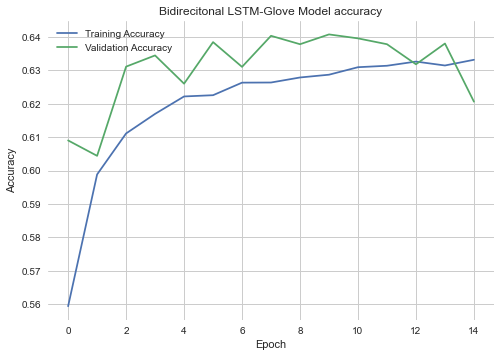

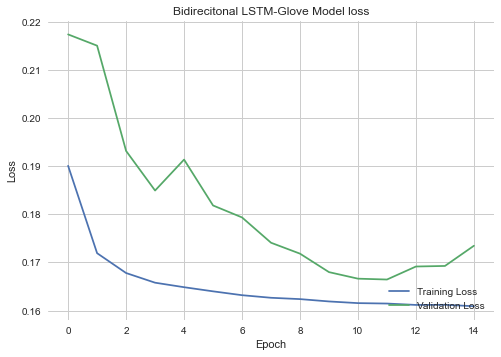

In [87]:
# Plot training & validation accuracy values
plt.plot(Bil_LSTM_Glove_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_accuracy'])
plt.title('Bidirecitonal LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_LSTM_Glove_model_fit.history['loss'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_loss'])
plt.title('Bidirecitonal LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 5) Gated Recurrent (GRU) with Glove

In [94]:
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1)(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(15, activation="sigmoid")(model)
GRU_Glove_model = Model(sequence_input, preds)

GRU_Glove_model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy', mean_pred, fmeasure, precision, recall])


### Visualize the Orchestrated GRU+Glove MODEL Architecture

In [95]:
GRU_Glove_model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 131,150,295
Trainable params: 114,895
Non-trainable params: 131,035,400
__________________________________________________________________________________________________


In [96]:
GRU_Glove_model_fit = GRU_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])

Epoch 1/15
504/504 [==============================] - 749s 1s/step - loss: 0.1856 - accuracy: 0.5690 - mean_pred: 0.0867 - fmeasure: 0.4519 - precision: 0.6994 - recall: 0.3409 - val_loss: 0.1677 - val_accuracy: 0.6247 - val_mean_pred: 0.0791 - val_fmeasure: 0.5285 - val_precision: 0.7448 - val_recall: 0.4098
Epoch 2/15
504/504 [==============================] - 741s 1s/step - loss: 0.1637 - accuracy: 0.6281 - mean_pred: 0.0809 - fmeasure: 0.5444 - precision: 0.7451 - recall: 0.4298 - val_loss: 0.1612 - val_accuracy: 0.6444 - val_mean_pred: 0.0838 - val_fmeasure: 0.5509 - val_precision: 0.7571 - val_recall: 0.4334
Epoch 3/15
504/504 [==============================] - 759s 2s/step - loss: 0.1566 - accuracy: 0.6487 - mean_pred: 0.0809 - fmeasure: 0.5692 - precision: 0.7571 - recall: 0.4569 - val_loss: 0.1563 - val_accuracy: 0.6562 - val_mean_pred: 0.0857 - val_fmeasure: 0.5876 - val_precision: 0.7432 - val_recall: 0.4863
Epoch 4/15
504/504 [==============================] - 751s 1s/step 

### Evaluate the GRU+Glove Model train and test score

In [97]:
#Train
GRU_Glove_train_score = GRU_Glove_model.evaluate(X_tra, y_tra, batch_size=batch_size2, verbose=1)
print('Train Loss:', GRU_Glove_train_score[0])
print('Train Accuracy:', GRU_Glove_train_score[1])

#Test
GRU_Glove_test_score = GRU_Glove_model.evaluate(X_test, y_test, batch_size=batch_size2, verbose=1)
print('Test Loss:', GRU_Glove_test_score[0])
print('Test Accuracy:', GRU_Glove_test_score[1])

504/504 [==============================] - 249s 495ms/step - loss: 0.1250 - accuracy: 0.7331 - mean_pred: 0.0799 - fmeasure: 0.6765 - precision: 0.8258 - recall: 0.5733
Train Loss: 0.1250074952840805
Train Accuracy: 0.7330513000488281
140/140 [==============================] - 71s 511ms/step - loss: 0.1466 - accuracy: 0.6816 - mean_pred: 0.0798 - fmeasure: 0.6236 - precision: 0.7654 - recall: 0.5267
Test Loss: 0.14655359089374542
Test Accuracy: 0.6816442012786865


### Plot Training & Validation Accuracy with the Loss values of the GRU+ Glove Model

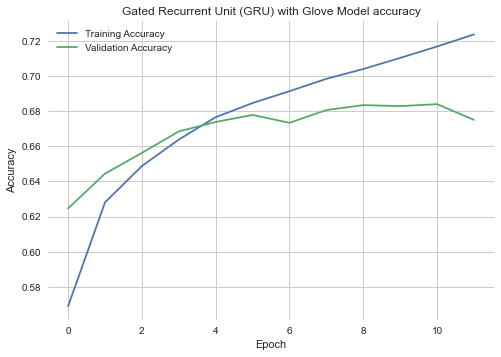

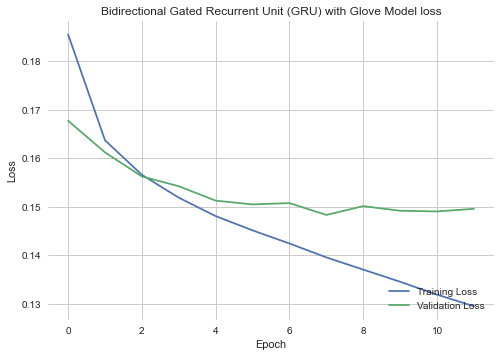

In [98]:
# Plot training & validation accuracy values
plt.plot(GRU_Glove_model_fit.history['accuracy'])
plt.plot(GRU_Glove_model_fit.history['val_accuracy'])
plt.title('Gated Recurrent Unit (GRU) with Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(GRU_Glove_model_fit.history['loss'])
plt.plot(GRU_Glove_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

## 6) Bidirectional Gated Recurrent (GRU) + Glove

In [100]:
#6 Bidirectional Gated Recurrent (GRU) with Glove
sequence_input = Input(shape=(max_len, ))
model = Embedding(input_dim =embedding_matrix.shape[0], input_length=max_len, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(15, activation="sigmoid")(model)
Bil_GRU_Glove_model = Model(sequence_input, preds)
Bil_GRU_Glove_model.compile(loss='binary_crossentropy',optimizer="Adam",metrics=['accuracy', mean_pred, fmeasure, precision, recall])

In [101]:
Bil_GRU_Glove_model.summary()


Model: "model_8"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Total params: 131,263,191
Trainable params: 227,791
Non-trainable params: 131,035,400
__________________________________________________________________________________________________


In [102]:
Bil_GRU_Glove_model_fit = Bil_GRU_Glove_model.fit(X_tra, y_tra, batch_size=batch_size2, epochs=num_epochs, validation_data=(X_val, y_val), callbacks=[early])


Epoch 1/15
504/504 [==============================] - 1622s 3s/step - loss: 0.1770 - accuracy: 0.5973 - mean_pred: 0.0844 - fmeasure: 0.4890 - precision: 0.7161 - recall: 0.3771 - val_loss: 0.1645 - val_accuracy: 0.6271 - val_mean_pred: 0.0808 - val_fmeasure: 0.5144 - val_precision: 0.7731 - val_recall: 0.3857
Epoch 2/15
504/504 [==============================] - 1461s 3s/step - loss: 0.1574 - accuracy: 0.6500 - mean_pred: 0.0808 - fmeasure: 0.5661 - precision: 0.7558 - recall: 0.4536 - val_loss: 0.1551 - val_accuracy: 0.6608 - val_mean_pred: 0.0810 - val_fmeasure: 0.5812 - val_precision: 0.7613 - val_recall: 0.4704
Epoch 3/15
504/504 [==============================] - 1617s 3s/step - loss: 0.1511 - accuracy: 0.6687 - mean_pred: 0.0809 - fmeasure: 0.5918 - precision: 0.7658 - recall: 0.4833 - val_loss: 0.1532 - val_accuracy: 0.6663 - val_mean_pred: 0.0774 - val_fmeasure: 0.6035 - val_precision: 0.7491 - val_recall: 0.5055
Epoch 4/15
504/504 [==============================] - 2269s 5s/s

### Plot Training & Validation Accuracy with the Loss values of the Bil GRU + Glove Model

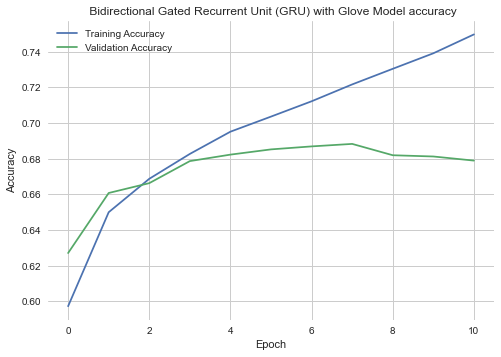

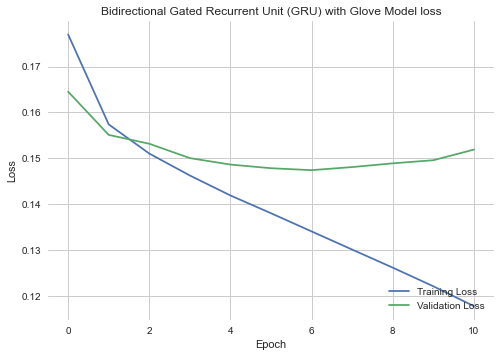

In [103]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_Glove_model_fit.history['accuracy'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_accuracy'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) with Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_Glove_model_fit.history['loss'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [105]:
from chart_studio import plotly
import plotly.offline as py
import plotly.graph_objs as go

# Evaluation of Experiment With GLOVE Pre-trained Embedding

#### Computing the highest of the evaluation matrics (per model) 

In [109]:
#Computing the highest of the evaluation matrics (per model)
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN-Glove', 'RNNs-Glove', 'LSTM-Glove', ' Bi-LSTM-Glove', 'GRU-Glove', 'Bi-GRU-Glove'],
                       [
                        #Loss Evaluation
                        round(np.max(CNN_Glove_model_fit.history['loss']), 3), round(np.max(RNN_Glove_model_fit.history['loss']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['loss']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['loss']), 3), round(np.max(GRU_Glove_model_fit.history['loss']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['accuracy']), 3), round(np.max(RNN_Glove_model_fit.history['accuracy']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['accuracy']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['accuracy']), 3), round(np.max(GRU_Glove_model_fit.history['accuracy']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['mean_pred']), 3), round(np.max(RNN_Glove_model_fit.history['mean_pred']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.max(GRU_Glove_model_fit.history['mean_pred']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['mean_pred']), 3)],

                        #F1-Measure Evaluation fmeasure
                        [round(np.max(CNN_Glove_model_fit.history['fmeasure']), 3), round(np.max(RNN_Glove_model_fit.history['fmeasure']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.max(GRU_Glove_model_fit.history['fmeasure']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['fmeasure']), 3)],
           
                        #Precision Evaluation precision
                        [round(np.max(CNN_Glove_model_fit.history['precision']), 3), round(np.max(RNN_Glove_model_fit.history['precision']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['precision']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['precision']), 3), round(np.max(GRU_Glove_model_fit.history['precision']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['precision']), 3)],
                       
                        #Recall Evaluation
                        [round(np.max(CNN_Glove_model_fit.history['recall']), 3), round(np.max(RNN_Glove_model_fit.history['recall']), 3), 
                        round(np.max(LSTM_Glove_model_fit.history['recall']), 3), round(np.max(Bil_LSTM_Glove_model_fit.history['recall']), 3), round(np.max(GRU_Glove_model_fit.history['recall']), 3),
                        round(np.max(Bil_GRU_Glove_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Glove_trained_embedding_with the max of the evaluation matrics (per model) _table')


#### Computing the mean of the evaluation matrics (per model) 

In [112]:
#Computing the mean of the evaluation matrics (per model)
trace = go.Table(
    header=dict(values=['Model', 'Loss', 'Accuracy', 'mean_pred', 'F-Measure', 'Precision', 'Recall'],
                line = dict(color='#7D7F80'),
                fill = dict(color='#a1c3d1'),
                align = ['left'] * 5),
    cells=dict(values=[['CNN-Glove', 'RNNs-Glove', 'LSTM-Glove', ' Bi-LSTM-Glove', 'GRU-Glove', 'Bi-GRU-Glove'],
                       [
                        #Loss Evaluation
                        round(np.mean(CNN_Glove_model_fit.history['loss']), 3), round(np.mean(RNN_Glove_model_fit.history['loss']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['loss']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['loss']), 3), round(np.mean(GRU_Glove_model_fit.history['loss']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['loss']), 3)],
                        
                        #Accuracy Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['accuracy']), 3), round(np.mean(RNN_Glove_model_fit.history['accuracy']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['accuracy']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['accuracy']), 3), round(np.mean(GRU_Glove_model_fit.history['accuracy']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['accuracy']), 3)],
               
                        #mean_pred Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['mean_pred']), 3), round(np.mean(RNN_Glove_model_fit.history['mean_pred']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['mean_pred']), 3), round(np.mean(GRU_Glove_model_fit.history['mean_pred']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['mean_pred']), 3)],

                        #F1-Measure Evaluation fmeasure
                        [round(np.mean(CNN_Glove_model_fit.history['fmeasure']), 3), round(np.mean(RNN_Glove_model_fit.history['fmeasure']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['fmeasure']), 3), round(np.mean(GRU_Glove_model_fit.history['fmeasure']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['fmeasure']), 3)],
            
                        #Precision Evaluation precision
                        [round(np.mean(CNN_Glove_model_fit.history['precision']), 3), round(np.mean(RNN_Glove_model_fit.history['precision']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['precision']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['precision']), 3), round(np.mean(GRU_Glove_model_fit.history['precision']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['precision']), 3)],

                       
                        #Recall Evaluation
                        [round(np.mean(CNN_Glove_model_fit.history['recall']), 3), round(np.mean(RNN_Glove_model_fit.history['recall']), 3), 
                        round(np.mean(LSTM_Glove_model_fit.history['recall']), 3), round(np.mean(Bil_LSTM_Glove_model_fit.history['recall']), 3), round(np.mean(GRU_Glove_model_fit.history['recall']), 3),
                        round(np.mean(Bil_GRU_Glove_model_fit.history['recall']), 3)]
                       ],
               line = dict(color='#7D7F80'),
               fill = dict(color='#EDFAFF'),
               align = ['left'] * 5))

layout = dict(width=800, height=400)
data = [trace]
fig = dict(data=data, layout=layout)
py.iplot(data, filename = 'Glove_trained_embedding_with the Mean value of the evaluation matrics (per model) _table')

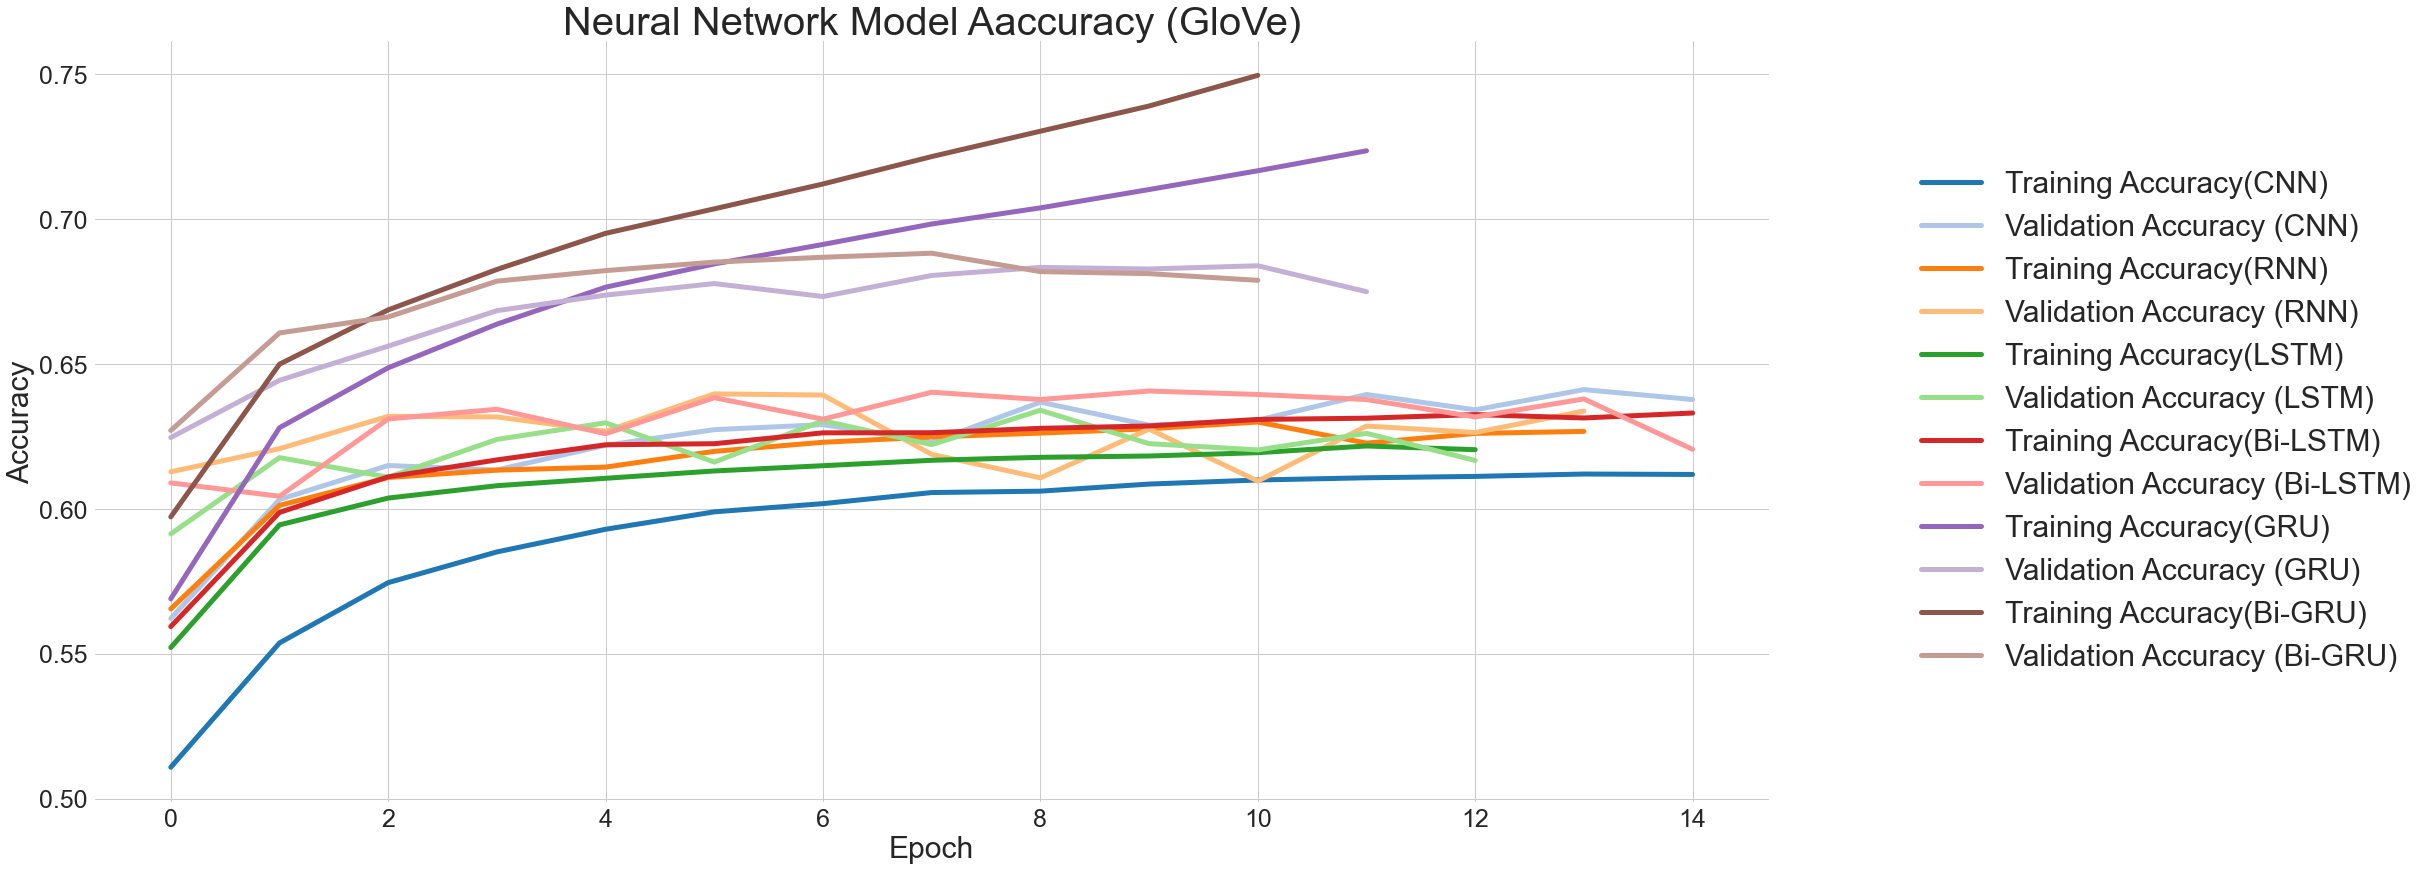

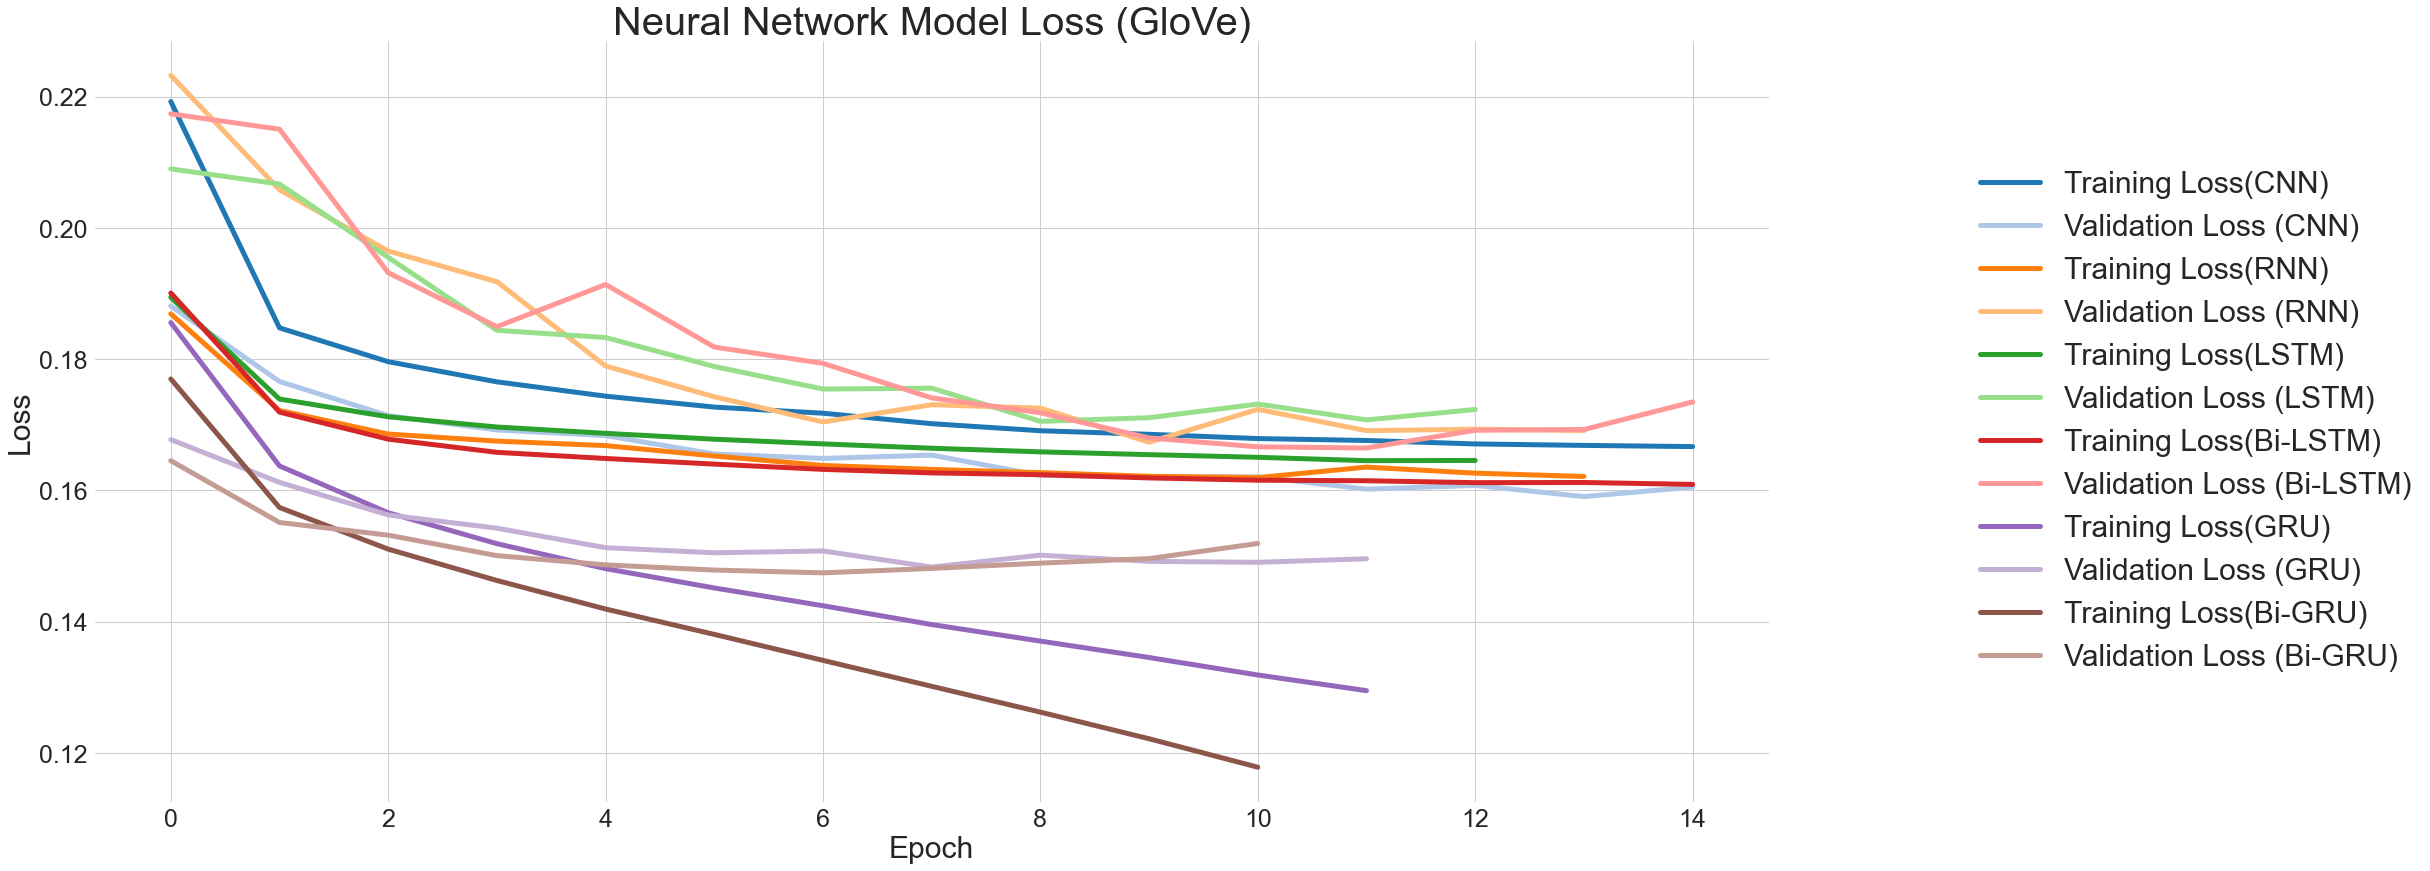

In [117]:
from matplotlib.cm import get_cmap
name = "tab20"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap
colors = cmap.colors  # type: list

plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation accuracy values

plt.plot(CNN_Glove_model_fit.history['accuracy'])
plt.plot(CNN_Glove_model_fit.history['val_accuracy'])
plt.plot(RNN_Glove_model_fit.history['accuracy'])
plt.plot(RNN_Glove_model_fit.history['val_accuracy'])

plt.plot(LSTM_Glove_model_fit.history['accuracy'])
plt.plot(LSTM_Glove_model_fit.history['val_accuracy'])
plt.plot(Bil_LSTM_Glove_model_fit.history['accuracy'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_accuracy'])

plt.plot(GRU_Glove_model_fit.history['accuracy'])
plt.plot(GRU_Glove_model_fit.history['val_accuracy'])
plt.plot(Bil_GRU_Glove_model_fit.history['accuracy'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_accuracy'])
plt.title('Neural Network Model Aaccuracy (GloVe)', fontsize=40)
plt.ylabel('Accuracy', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Accuracy(CNN)', 'Validation Accuracy (CNN)',
           'Training Accuracy(RNN)', 'Validation Accuracy (RNN)',
           'Training Accuracy(LSTM)', 'Validation Accuracy (LSTM)',
           'Training Accuracy(Bi-LSTM)', 'Validation Accuracy (Bi-LSTM)',
           'Training Accuracy(GRU)', 'Validation Accuracy (GRU)',
           'Training Accuracy(Bi-GRU)', 'Validation Accuracy (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)

plt.show()


plt.rc('lines', linewidth = 5)
fig, ax2 = plt.subplots(figsize=(30, 14))
ax2.set_prop_cycle(color=colors)
ax2.tick_params(axis='x', labelsize=25)
ax2.tick_params(axis='y', labelsize=25)

# Plot training & validation loss values
plt.plot(CNN_Glove_model_fit.history['loss'])
plt.plot(CNN_Glove_model_fit.history['val_loss'])
plt.plot(RNN_Glove_model_fit.history['loss'])
plt.plot(RNN_Glove_model_fit.history['val_loss'])

plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.plot(LSTM_Glove_model_fit.history['val_loss'])
plt.plot(Bil_LSTM_Glove_model_fit.history['loss'])
plt.plot(Bil_LSTM_Glove_model_fit.history['val_loss'])

plt.plot(GRU_Glove_model_fit.history['loss'])
plt.plot(GRU_Glove_model_fit.history['val_loss'])
plt.plot(Bil_GRU_Glove_model_fit.history['loss'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_loss'])
plt.title('Neural Network Model Loss (GloVe)', fontsize=40)
plt.ylabel('Loss', fontsize=30)
plt.xlabel('Epoch', fontsize=30)
plt.legend(['Training Loss(CNN)', 'Validation Loss (CNN)',
           'Training Loss(RNN)', 'Validation Loss (RNN)',
           'Training Loss(LSTM)', 'Validation Loss (LSTM)',
           'Training Loss(Bi-LSTM)', 'Validation Loss (Bi-LSTM)',
           'Training Loss(GRU)', 'Validation Loss (GRU)',
           'Training Loss(Bi-GRU)', 'Validation Loss (Bi-GRU)'], loc='right', bbox_to_anchor=(1.4, .5), fontsize=30)
plt.show()